<a href="https://colab.research.google.com/github/DrorNeumeier/MyPalindromeMaker/blob/main/Drors_Palindromes_Maker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Come join me in creating palindromes

#Step1: setup
Run the cell below by clicking the Play button on the code block.
This step gets the code from github and installs any required libraries

In [101]:
import os
if not os.path.exists("MyPalindromeMaker"):
  !git clone https://github.com/DrorNeumeier/MyPalindromeMaker
else:
  !git -C MyPalindromeMaker pull 

!pip install transformers


import random 
from transformers import BertTokenizer
from transformers import BertModel, BertConfig
import torch
import tensorflow as tf
import pandas as pd

print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

print("setting up the GPU devices that we will use in training later")
# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print("##################################################################")
    print("Can't find a GPU. You REALLY want a GPU for this.")
    print("Go click on the little arrow on the top right next to the RAM and Disk monitors")
    print("Select View Resources")
    print("See if a GPU shows up. I bet you it does not.")
    print("Now click on 'change runtime type' at the bottom")
    print("Under Hardware accelerator make sure you select a GPU")
    print("Try running this cell again")
    print("##################################################################")
    raise SystemError('GPU device not found')

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

print("\n\n\nContinue to the next step...")

remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 6 (delta 4), reused 6 (delta 4), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/DrorNeumeier/MyPalindromeMaker
   1b69262..7eb84e7  main       -> origin/main
Updating 1b69262..7eb84e7
Fast-forward
 cleanKJV.py                    |      3 +-
 dictionaries/kjv_sentences.txt | 104369 +++++++++++++++++++-------------------
 dictionaries/kjv_words.txt     |  25116 ++++-----
 3 files changed, 64739 insertions(+), 64749 deletions(-)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Loading BERT tokenizer...
setting up the GPU devices that we will use in training later
Found GPU at: /device:GPU:0
There are 1 GPU(s) available.
We will use the GPU: Tesla T4



Continue to the next step...


#Step2: The palindrome maker
Run the cell below by clicking the Play button on the code block.
This step builds my code to make palindromes.


In [102]:
import random
import time
import datetime
import numpy as np

def loadWords(filename):
  f=open(filename)
  words=f.readlines()
  words=[word.strip().lower() for word in words]
  backwardWords = [word[::-1] for word in words]

  return words, backwardWords

def loadSentences(filename):
  f=open(filename)
  sentences=f.readlines()
  sentences=[sentence.strip().lower() for sentence in sentences]

  return sentences


def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))

def makeDictionary(wordList,currentString):

  #print("makeDictionary", currentString)

  ret={}
  ret["letters"] = {}

  letters = []
  newWordList=[]


  for word in wordList:
    if(word.startswith(currentString) and len(word)>len(currentString)):
      
      nextLetter=word[len(currentString)]
      newWordList.append(word)
      
      if nextLetter not in letters:
        letters.append(nextLetter)

  for letter in letters:
    ret["letters"][letter]=makeDictionary(newWordList, currentString+letter)

  if(currentString in wordList):
    ret["letters"][" "]={}

  return ret

def getDictionaryNode(dictionary, currentString):
  if len(currentString) == 0:
    return dictionary

  letter = currentString[0]
  currentString = currentString[1:]

  if letter not in dictionary["letters"].keys():
    return None

  return getDictionaryNode(dictionary["letters"][letter], currentString)


def makePalindrome(forwardDictionary, backwardDictionary, forwardString, backwardString, forwardList, backwardList, numberOfWords, printDebug=False):
  if printDebug:
    print(forwardList, forwardString,"...", backwardString, backwardList)
  
  forwardNode=getDictionaryNode(forwardDictionary, forwardString)
  backwardNode=getDictionaryNode(backwardDictionary, backwardString[::-1])

  if(len(forwardList)+len(backwardList) == numberOfWords-1 and (getDictionaryNode(forwardDictionary, forwardString+backwardString) != None and " " in getDictionaryNode(forwardDictionary, forwardString+backwardString)["letters"].keys())):
    forwardList.append(forwardString+backwardString)
    forwardString=""
    backwardString=""
    return forwardList+backwardList


  if(random.choice(list(forwardNode["letters"].keys()))==" "):
    forwardList.append(forwardString)
    forwardString=""
    forwardNode=forwardDictionary

  if(random.choice(list(backwardNode["letters"].keys()))==" "):
    backwardList.insert(0,backwardString)
    backwardString=""
    backwardNode=backwardDictionary

  if(len(forwardList)+len(backwardList) == numberOfWords and len(backwardString)==0 and len(forwardString)==0):
    return forwardList+backwardList

  if (len(forwardList)+len(backwardList) > numberOfWords):
      return None
  
  possibleLetters=(set(forwardNode["letters"].keys()) & set(backwardNode["letters"].keys())) - set(" ")
  possibleLetters = list(possibleLetters)

  #print(forwardNode["letters"].keys(), backwardNode["letters"].keys())
  #print(possibleLetters)

  if(len(possibleLetters)==0):
    return None

  
  random.shuffle(possibleLetters)
  for letter in possibleLetters:
    forwardString_=forwardString+letter
    backwardString_=letter+backwardString
    forwardList_= forwardList.copy()
    backwardList_=backwardList.copy()

    ret = makePalindrome(forwardDictionary, backwardDictionary, forwardString_, backwardString_, forwardList_, backwardList_, numberOfWords, printDebug=printDebug)
    if(ret):
      return ret


def tokenizeSentences(sentences):
  inputIds = []
  attentionMasks = []

  # For every sentence...
  for sentence in sentences:
      # `encode_plus` will:
      #   (1) Tokenize the sentence.
      #   (2) Prepend the `[CLS]` token to the start.
      #   (3) Append the `[SEP]` token to the end.
      #   (4) Map tokens to their IDs.
      #   (5) Pad or truncate the sentence to `max_length`
      #   (6) Create attention masks for [PAD] tokens.
      encoded_dict = tokenizer.encode_plus(
                          sentence,                      # Sentence to encode.
                          add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                          truncation=True,
                          max_length = 64,           # Pad & truncate all sentences.
                          pad_to_max_length = True,
                          #padding=True,
                          return_attention_mask = True,   # Construct attn. masks.
                          return_tensors = 'pt',     # Return pytorch tensors.
                    )
        
      #The tokenized IDs
      inputIds.append(encoded_dict['input_ids'])
      #A mask with zeros past the end of the sentence 
      attentionMasks.append(encoded_dict['attention_mask'])

  return inputIds, attentionMasks

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)
    
print("Continue to the next step...")


Continue to the next step...


#Step 3: Choose your dictionary and language reference
Select a dictionary from the drop downs to the right and run the cell below by clicking the Play button on the code block.<br>
This will load the selected dictionary.

loading dictionary King James:kjv this can take a minute ro so
this dictionary has 12676 many words in it
this dictionary has 52403 sentences supporting it
Average sentence length 13.811804667671698
Sentence length histogram
dictionary is loaded.


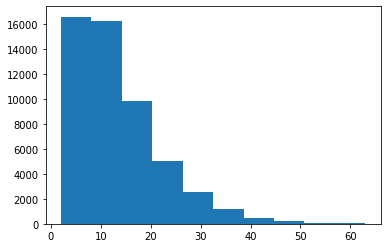

In [122]:
import matplotlib.pyplot as plt 

dictionaryName = 'King James:kjv' #@param ["English:eng", "King James:kjv", "Sci Fi:sci", "Shakespeare:sks"]
dictionaryPrefix = dictionaryName.split(":")[1]

print("loading dictionary", dictionaryName, "this can take a minute ro so")

words, backwardWords = loadWords("MyPalindromeMaker/dictionaries/%s_words.txt" % dictionaryPrefix)

sentences = loadSentences("MyPalindromeMaker/dictionaries/%s_sentences.txt" % dictionaryPrefix)

print("this dictionary has", len(words), "many words in it")
print("this dictionary has", len(sentences), "sentences supporting it")

sentenceLenghts = []
for sentence in sentences:
  wordCount = sentence.count(" ")
  sentenceLenghts.append(wordCount)

print("Average sentence length", sum(sentenceLenghts)/len(sentenceLenghts))
print("Sentence length histogram")
counts, bins = np.histogram(sentenceLenghts)
plt.hist(bins[:-1], bins, weights=counts)

#we keep the sentence lengths for later to make realistic gibirish
sentenceLenghts = {}
for sentence in sentences:
  wordCount = sentence.count(" ")

  if wordCount not in sentenceLenghts.keys():
    sentenceLenghts[wordCount] = 0
  
  sentenceLenghts[wordCount] = sentenceLenghts[wordCount] + 1

sentenceLenghtsKeys = list(sentenceLenghts)
sentenceLenghtsKeys.sort()



forwardDictionary=makeDictionary(words, "")
backwardDictionary=makeDictionary(backwardWords, "")

print("dictionary is loaded.")








#Lets try to make a palindrome just for fun

In [123]:
palindrome = makePalindrome(forwardDictionary, backwardDictionary, "", "", [], [], 10, printDebug=True)

print(" ".join(palindrome))

[]  ...  []
[] a ... a []
[] ai ... ia []
[] air ... ria []
['air'] y ... yria []
['air'] d ... dria []
['air'] da ... adria []
['air'] dat ... t ['adria']
['air'] dath ... ht ['adria']
['air'] day ... y ['adria']
['air', 'day'] u ... uy ['adria']
['air', 'day'] e ... ey ['adria']
['air', 'day'] eh ... hey ['adria']
['air', 'day'] ev ... vey ['adria']
['air', 'day'] el ... ley ['adria']
['air', 'day'] ell ... lley ['adria']
['air', 'day'] ella ... alley ['adria']
['air', 'day'] er ... rey ['adria']
['air', 'day', 'er'] g ... grey ['adria']
['air', 'day', 'er'] ge ... e ['grey', 'adria']
['air', 'day', 'er'] ger ... re ['grey', 'adria']
['air', 'day', 'er'] geri ... ire ['grey', 'adria']
['air', 'day', 'er'] gera ... are ['grey', 'adria']
['air', 'day', 'er'] gerar ... rare ['grey', 'adria']
['air', 'day', 'er', 'gerar'] f ... f ['rare', 'grey', 'adria']
['air', 'day', 'er', 'gerar'] fi ... if ['rare', 'grey', 'adria']
['air', 'day', 'er', 'gerar'] fr ... rf ['rare', 'grey', 'adria']
['

#Now it is time to train the Natural Lang Processing model
We are going to use a Bidirectional Encoder Representations from Transformers (or Bert for short) model.
Bert models are good at processing language. You can learn more about them [here](https://www.techtarget.com/searchenterpriseai/definition/BERT-language-model)
We will be using one called [BertForSequenceClassification](https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#bertforsequenceclassification)
This Bert model is a classifier. That means it has a layer at the end that classifies the input into 1 of several ... well classifications. In our case we will have 2 classificaitons: 1 and 0. We tag "good" sentences from our langudge reference set as a 1 and "bad" gibirish sentences as a 0. Hopefully our classifier will learn to tell real sentences from gibirish ones. <br>

The next few steps are based on multiple tutorials and we are thankful to the many people who help make ML accessible by publishing thier code. In particular see [BERT-fine-tuning](https://mccormickml.com/2019/07/22/BERT-fine-tuning/) for in depth details on what we are doing here. 

#Step 4: Setup a training set
You can pick the size of the training set to use on the right. We recomand to use 5000.<br>
Run the cell below by clicking the Play button on the code block.<br>
This will create the training set but will not start the training yet. That happens in the next cell.

In [125]:
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW, BertConfig, get_linear_schedule_with_warmup
import shutil

trainingSetSize = "10000" #@param [5000, 10000, 20000]

trainingSetSize = int(trainingSetSize)
trainingSetSizeHalf = int(trainingSetSize/2)

#shutil.rmtree("model_%s" % dictionaryPrefix)

if os.path.exists("model_%s" % dictionaryPrefix ):
  print("This model is already trained. You can skip to the next step")
else:

  print("First we need to create the training set")

  trainingListSentences = random.choices(sentences, k=trainingSetSizeHalf)
  trainingListLabels = [1] * (trainingSetSizeHalf)


  #print(sentenceLenghts)
  generatedSenteceLengths = random.choices(list(sentenceLenghts.keys()), weights=sentenceLenghts.values(), k=trainingSetSizeHalf)

  for l in generatedSenteceLengths:
    if l <= 0 or l > 63:
      continue
    trainingListSentences.append(" ".join(random.choices(list(words), k=l)))
    trainingListLabels.append(0)

  print("Here is a real sentence")
  print("\"",trainingListSentences[0],"\"")
  print("\nAnd here is a gibirish sentence")
  print("\"",trainingListSentences[trainingSetSizeHalf], "\"")


  print("\nand here is the tokenized sentence")
  print('Tokenized: ', tokenizer.tokenize(trainingListSentences[0]))
  print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(trainingListSentences[0])))

  inputIds, attentionMasks = tokenizeSentences(trainingListSentences)
  # Convert the lists into tensors.
  inputIds = torch.cat(inputIds, dim=0)
  attentionMasks = torch.cat(attentionMasks, dim=0)
  trainingListLabels = torch.tensor(trainingListLabels)

  # Combine the training inputs into a TensorDataset.
  dataset = TensorDataset(inputIds, attentionMasks, trainingListLabels)

  # Create a 90-10 train-validation split.

  # Calculate the number of samples to include in each set.
  train_size = int(0.9 * len(dataset))
  val_size = len(dataset) - train_size

  # Divide the dataset by randomly selecting samples.
  train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

  print('{:>5,} training samples'.format(train_size))
  print('{:>5,} validation samples'.format(val_size))
  print("\n\n")

  # The DataLoader needs to know our batch size for training, so we specify it 
  # here. For fine-tuning BERT on a specific task, the authors recommend a batch 
  # size of 16 or 32.
  batch_size = 32

  # Create the DataLoaders for our training and validation sets.
  # We'll take training samples in random order. 
  train_dataloader = DataLoader(
              train_dataset,  # The training samples.
              sampler = RandomSampler(train_dataset), # Select batches randomly
              batch_size = batch_size # Trains with this batch size.
          )

  # For validation the order doesn't matter, so we'll just read them sequentially.
  validation_dataloader = DataLoader(
              val_dataset, # The validation samples.
              sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
              batch_size = batch_size # Evaluate with this batch size.
          )

  #this is the actual model we will be training
  model = BertForSequenceClassification.from_pretrained(
      "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
      num_labels = 2, # The number of output labels--2 for binary classification.
                      # You can increase this for multi-class tasks.   
      output_attentions = False, # Whether the model returns attentions weights.
      output_hidden_states = False, # Whether the model returns all hidden-states.
  )

  # Tell pytorch to run this model on the GPU.
  model.cuda()

  optimizer = torch.optim.AdamW(model.parameters(),
                    lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                    eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                  )

  # Number of training epochs. The BERT authors recommend between 2 and 4. 
  # This is probably too much. We will end training early if it looks like we are overfitting
  epochs = 4

  # Total number of training steps is [number of batches] x [number of epochs]. 
  # (Note that this is not the same as the number of training samples).
  total_steps = len(train_dataloader) * epochs

  # Create the learning rate scheduler.
  scheduler = get_linear_schedule_with_warmup(optimizer, 
                                              num_warmup_steps = 0, # Default value in run_glue.py
                                              num_training_steps = total_steps)

 
print("Continue to next step")


First we need to create the training set
Here is a real sentence
" neither let the flocks nor herds feed before that mount "

And here is a gibirish sentence
" eased teil belief azaz pushing korathites gnash smooth freewoman venison olives ptolemais siphmoth flattery sisamai reputed bethjeshimoth "

and here is the tokenized sentence
Tokenized:  ['neither', 'let', 'the', 'flock', '##s', 'nor', 'herds', 'feed', 'before', 'that', 'mount']
Token IDs:  [4445, 2292, 1996, 19311, 2015, 4496, 28822, 5438, 2077, 2008, 4057]
9,000 training samples
1,000 validation samples





Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Continue to next step


#Step 5: Do the actual training
Run the cell below by clicking the Play button on the code block.<br>
This will start the actual training of the model. This will take a few minutes. Go make a cup of coffee

In [126]:
if os.path.exists("model_%s" % dictionaryPrefix ):
  print("This model is already trained. You can skip to the next step")
else:


  # Set the seed value to create arbitrary randomness
  seed_val = 42

  random.seed(seed_val)
  np.random.seed(seed_val)
  torch.manual_seed(seed_val)
  torch.cuda.manual_seed_all(seed_val)

  # We'll store a number of quantities such as training and validation loss, 
  # validation accuracy, and timings.
  training_stats = []

  # Measure the total training time for the whole run.
  total_t0 = time.time()

  avg_val_accuracy = 0

  # For each epoch...
  for epoch_i in range(0, epochs):

      print("")
      print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))

      #if epoch_i >= 2 and avg_val_accuracy > 0.99:
      #  print("Training accuracy is over %99 and it's been 2 epochs. We can call it quits early.")
      #  break

      print('Training...')

      t0 = time.time()

      total_train_loss = 0

      # Put the model into training mode.
      model.train()

      # For each batch of training data...
      for step, batch in enumerate(train_dataloader):

          # Progress update every 40 batches.
          if step % 40 == 0 and not step == 0:
              # Calculate elapsed time in minutes.
              elapsed = format_time(time.time() - t0)
              
              # Report progress.
              print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

          # Unpack this training batch from our dataloader and copy to the GPU using the 'to' method
          b_input_ids = batch[0].to(device)
          b_input_mask = batch[1].to(device)
          b_labels = batch[2].to(device)

          # Always clear any previously calculated gradients before performing a
          # backward pass.
          model.zero_grad()        

          # Perform a forward pass (evaluate the model on this training batch).
          loss, logits = model(b_input_ids, 
                              token_type_ids=None, 
                              attention_mask=b_input_mask, 
                              labels=b_labels, return_dict = False)

          # Accumulate the training loss over all of the batches so that we can
          # calculate the average loss at the end.
          total_train_loss += loss.item()

          # Perform a backward pass to calculate the gradients.
          loss.backward()

          # Clip the norm of the gradients to 1.0.
          # This is to help prevent the "exploding gradients" problem.
          torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

          # Update parameters and take a step using the computed gradient.
          optimizer.step()

          # Update the learning rate.
          scheduler.step()

      # Calculate the average loss over all of the batches.
      avg_train_loss = total_train_loss / len(train_dataloader)            
      
      # Measure how long this epoch took.
      training_time = format_time(time.time() - t0)

      print("")
      print("  Average training loss: {0:.4f}".format(avg_train_loss))
      print("  Training epcoh took: {:}".format(training_time))
          
      # ========================================
      #               Validation
      # ========================================
      # After the completion of each training epoch, measure our performance on
      # our validation set.

      print("")
      print("Running Validation...")

      t0 = time.time()

      # Put the model in evaluation mode
      model.eval()

      # Tracking variables 
      total_eval_accuracy = 0
      total_eval_loss = 0
      nb_eval_steps = 0

      # Evaluate data for one epoch
      for batch in validation_dataloader:
          
          b_input_ids = batch[0].to(device)
          b_input_mask = batch[1].to(device)
          b_labels = batch[2].to(device)
          
          # Tell pytorch not to bother with constructing the compute graph during
          # the forward pass, since this is only needed for backprop (training).
          with torch.no_grad():        

              # Forward pass
              (loss, logits) = model(b_input_ids, 
                                    token_type_ids=None, 
                                    attention_mask=b_input_mask,
                                    labels=b_labels, return_dict = False)
              
          # Accumulate the validation loss.
          total_eval_loss += loss.item()

          # Move logits and labels to CPU
          logits = logits.detach().cpu().numpy()
          label_ids = b_labels.to('cpu').numpy()

          # Calculate the accuracy for this batch of test sentences, and
          # accumulate it over all batches.
          total_eval_accuracy += flat_accuracy(logits, label_ids)
          

      # Report the final accuracy for this validation run.
      avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
      print("  Accuracy: {0:.4f}".format(avg_val_accuracy))

      # Calculate the average loss over all of the batches.
      avg_val_loss = total_eval_loss / len(validation_dataloader)
      
      # Measure how long the validation run took.
      validation_time = format_time(time.time() - t0)
      
      print("  Validation Loss: {0:.4f}".format(avg_val_loss))
      print("  Validation took: {:}".format(validation_time))

      # Record all statistics from this epoch.
      training_stats.append(
          {
              'epoch': epoch_i + 1,
              'Training Loss': avg_train_loss,
              'Valid. Loss': avg_val_loss,
              'Valid. Accur.': avg_val_accuracy,
              'Training Time': training_time,
              'Validation Time': validation_time
          }
      )

  print("")
  print("Training complete!")

  print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

  # Create a DataFrame from our training statistics.
  pd.set_option('precision', 2)
  df_stats = pd.DataFrame(data=training_stats)
  df_stats = df_stats.set_index('epoch')

  print(df_stats)

  print("saving the model")
  model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
  model_to_save.save_pretrained("model_%s" % dictionaryPrefix)
  tokenizer.save_pretrained("model_%s" % dictionaryPrefix)

print("Continue to next step")


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    282.    Elapsed: 0:00:14.
  Batch    80  of    282.    Elapsed: 0:00:27.
  Batch   120  of    282.    Elapsed: 0:00:41.
  Batch   160  of    282.    Elapsed: 0:00:55.
  Batch   200  of    282.    Elapsed: 0:01:09.
  Batch   240  of    282.    Elapsed: 0:01:23.
  Batch   280  of    282.    Elapsed: 0:01:37.

  Average training loss: 0.0450
  Training epcoh took: 0:01:37

Running Validation...
  Accuracy: 1.0000
  Validation Loss: 0.0020
  Validation took: 0:00:03

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    282.    Elapsed: 0:00:14.
  Batch    80  of    282.    Elapsed: 0:00:28.
  Batch   120  of    282.    Elapsed: 0:00:41.
  Batch   160  of    282.    Elapsed: 0:00:55.
  Batch   200  of    282.    Elapsed: 0:01:09.
  Batch   240  of    282.    Elapsed: 0:01:23.
  Batch   280  of    282.    Elapsed: 0:01:37.

  Average training loss: 0.0035
  Training epcoh took: 0:01:37

Running Validation...
  Accuracy

#Step 6: Lets make some palindromes!
Ok we have our model trained for our selected dictionary. The model is good at seperating real sentences from gibirish.
We can now make a bunch of palindromes and run them through the model to filter our the gibirish. 

Select the number of words in a palindrome and number of palindromes you want to make from the drop down on the right and run the cell below by clicking the Play button on the code block.

In [128]:
numberOfWordsInPalindrome = "6" #@param [5,6,7,8,9,10,15,20,30]
desiredNumberOfPalindromes = "10" #@param [5, 10, 20]

numberOfWordsInPalindrome = int(numberOfWordsInPalindrome)
desiredNumberOfPalindromes = int(desiredNumberOfPalindromes)

tokenizer = BertTokenizer.from_pretrained("model_%s" % dictionaryPrefix)
model_loaded = BertForSequenceClassification.from_pretrained("model_%s" % dictionaryPrefix)
model_loaded = model_loaded.to(device)

palindromesFound = []

while len(palindromesFound) < desiredNumberOfPalindromes:

  #make a palindrome
  palindrome = makePalindrome(forwardDictionary, backwardDictionary, "", "", [], [], numberOfWordsInPalindrome)
  sentence = " ".join(palindrome)

  #now run it through the model to see if it a sensible sentence
  encoded_dict = tokenizer.encode_plus(
                        sentence,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

  # Add the encoded sentence to the list.
  inputId = encoded_dict['input_ids']

  # And its attention mask (simply differentiates padding from non-padding).
  attentionMask = encoded_dict['attention_mask']
  inputId = torch.LongTensor(inputId)
  attentionMask = torch.LongTensor(attentionMask)


  inputId = inputId.to(device)
  attentionMask = attentionMask.to(device)

  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model_loaded(inputId, token_type_ids=None, attention_mask=attentionMask)

  logits = outputs[0]
  index = logits.argmax()

  if index == 1:
      print(sentence)
      palindromesFound.append(sentence)
      #print("Gramatically correct")
  else:
      #print("#######", sentence)
      #print("Gramatically in-correct")
      pass





Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


zaza er of all afore azaz
ye box o bee box obey
he ir aharah ass aharah arieh
wen ishtob and accad naboth sinew
flow eyes less else ye wolf
nun ahiman all an ami hanun
iri inn unni inn unni iri
naam etham at tamah tema an
ha laban amam iim amana balah
wall upon addan o pul law
